In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
from sklearn.datasets import load_iris

In [31]:
data = load_iris()

In [32]:
X = pd.DataFrame(data.data,columns=data.feature_names)

In [33]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
y = pd.DataFrame(data.target)

In [35]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [36]:
import seaborn as sns

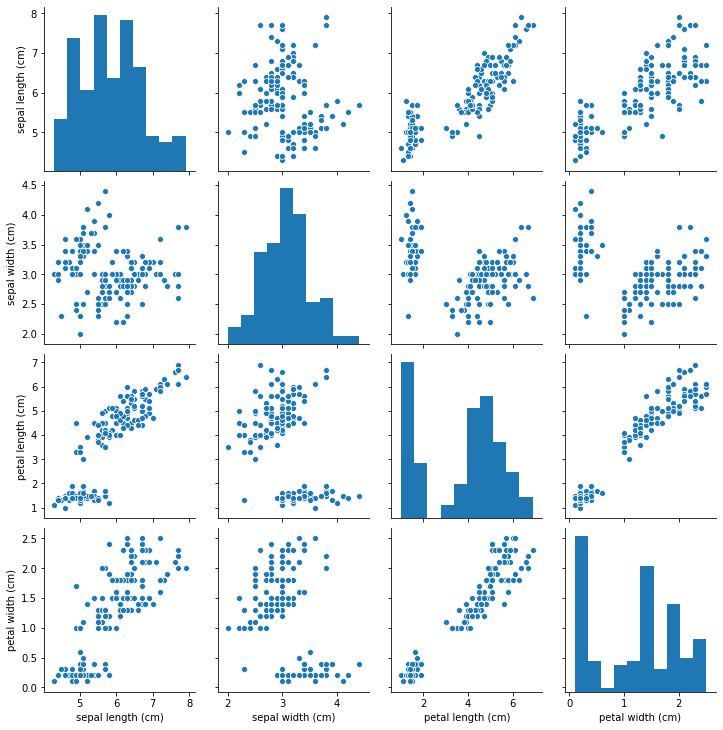

In [37]:
sns.pairplot(X)

In [38]:
from sklearn.cluster import KMeans

In [39]:
KM = KMeans(n_clusters=5,random_state=69)                                 #initially we are going with 5 clusters

In [40]:
KM.fit(X)

KMeans(n_clusters=5, random_state=69)

In [41]:
predict = KM.fit_predict(X.values)

In [42]:
X['Predicted_Cluster'] = predict

In [43]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Predicted_Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [44]:
KM.cluster_centers_

array([[6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

In [45]:
X = X.values

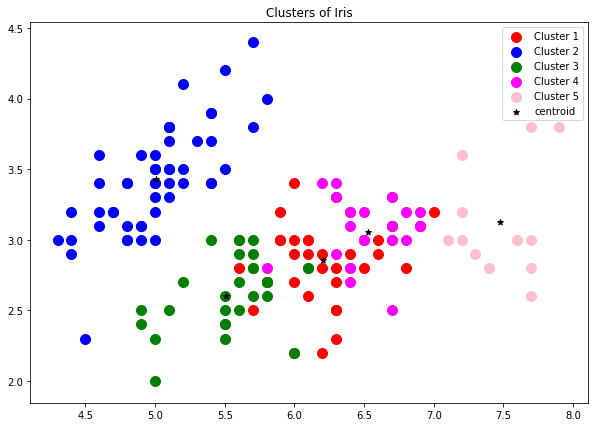

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[predict == 3, 0], X[predict == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[predict == 4, 0], X[predict == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.title('Clusters of Iris')
plt.legend()
plt.show()

## Checking Error w.r.t number of clusters

In [55]:
error = []
for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit(X)
    error.append(km.inertia_)

([<matplotlib.axis.XTick at 0x23076d315f8>,
 <a list of 10 Text xticklabel objects>)

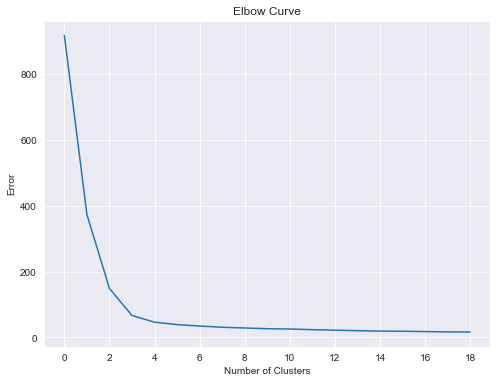

In [81]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.plot(error)
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.title('Elbow Curve')
plt.xticks(np.arange(0,20,2))

In [74]:
Km = KMeans(n_clusters=3)                                 #here we are taking 3 clusters after checking the graph
Km.fit(X)

KMeans(n_clusters=3)

In [75]:
y_predict = Km.fit_predict(X)

In [76]:
Km.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     , 1.        ],
       [5.934375  , 2.7546875 , 4.41875   , 1.4234375 , 0.78125   ],
       [6.84444444, 3.08055556, 5.77222222, 2.125     , 3.33333333]])

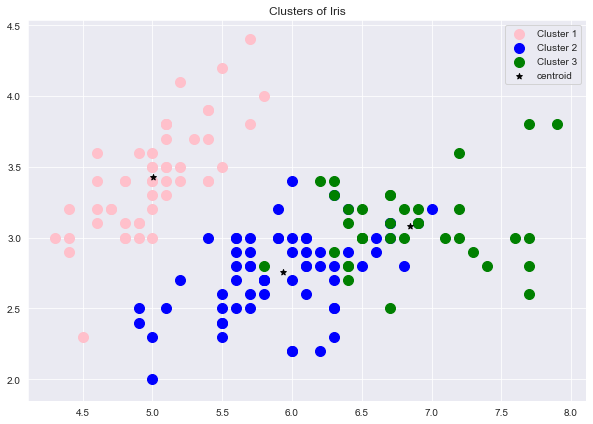

In [80]:
plt.figure(figsize=(10,7))
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Km.cluster_centers_[:,0],Km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.title('Clusters of Iris')
plt.legend()
plt.show()